# Machine Learning Landscape

##The Machine learning
Previously when the data scientist provide the application.

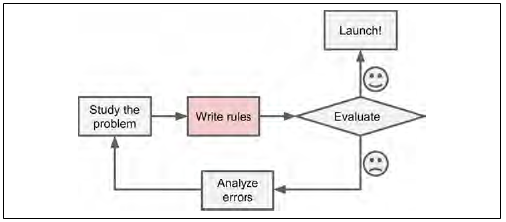

Now the ML technique can learn and evaluation.

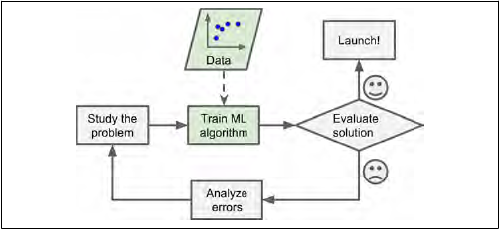

The automatic approach

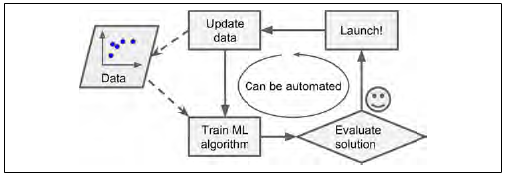

##Type of machine learning

**Supervised Learning**

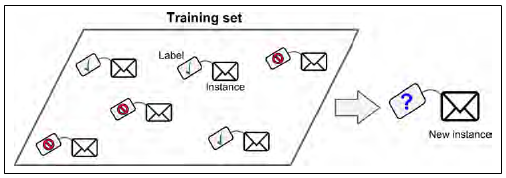

Supervised learning tasks normally a classification.

the import algorithms are
* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* Support Vector Machines (SVMs)
* Decision Trees and Random Forests
* Neural networks

**Unsupervised Learning**

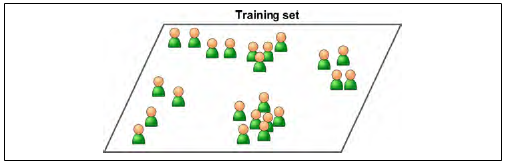

Guest or label the unlabel data set. 

The system tried to learn without a teacher

The important unsupervised learning algorithms are

* Clustering
  * k-Means
  * Hierarchical Cluster Analysis (HCA)
  * Expectation Maximization
* Visualization and dimensionality reduction
  * Principal Component Analysis (PCA)
  * Kernel PCA
  * Locally-Linear Embedding (LLE)
  * t-distributed Stochastic Neighbor Embedding (t-SNE)
*  Association rule learning
  * Apriori
  * Eclat

## Batch and Online Learning

**Batch Learning**

so call offline learning, the new data to learn is required each time. The system need to stop and replace with a new model



**Online learning**

the system learns by feeding the data instance sequentially. each learning step is fast and cheap.

The new data must be provided on the fly

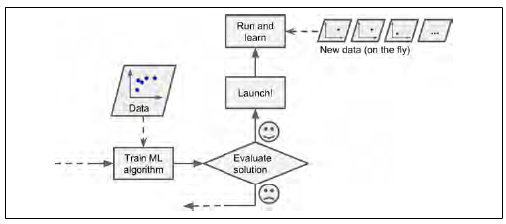

#Clasification Example

In [1]:
#Setup code
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##MNIST
---

The data set of 70,000 small image of digits handwritten in hight school students and empless of the US Cencus Bureau

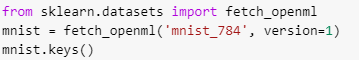

and then see the data

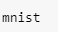

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , version =1 )
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

From the key, we can see that


*   `DESCR` key describe the data set
*   `data` key contain and array with one row per instance and one column per feature
*   `target` key containg and array with label

now we can see the size of these arrays:

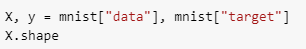

image.png


In [4]:
X , y  = mnist["data"], mnist["target"]
x.shape

NameError: name 'x' is not defined

In [ ]:
X

In [ ]:
y.shape

In [ ]:
y

There are 70,000 images, and each image has 784 features. 

This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). 

Let’s take a peek at one digit from the dataset

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

you can see your digit in the images folder, try to see other images?

We can check the label of the given image using the label

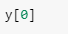

image.png

In [ ]:
y[0]

In [ ]:
y[999]

In [ ]:
y[2]

You can see more data at a time using the plot function.

In [ ]:
y = y.astype(np.uint8)
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
  
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

Now we have to split the data into a training set (the first 60,000 images) , and a test set (last 10,000).

image.png

In [ ]:
X_train , X_test , y_train , y_test = X[:60000] ,X[60000:] , y[:60000] , y[60000:]

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

Let's shuffle the trainign set. 

This guarantee that all cross-validatoin folds will be similar

Some learning algorithm are sensitve to the order of the training instances.

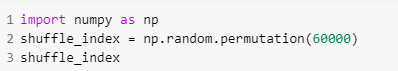

In [ ]:
import numpy as np
shuffle_index  = np.random.permutation(60000)
shuffle_index

and then set the training data from the permutation

image.png

In [ ]:
X_train , y_train = X_train[shuffle_index] , y_train[shuffle_index]

In [ ]:
o = X_train , y_train = X_train[shuffle_index] , y_train[shuffle_index]
o

##Training Binary Classifier

---

The binary classification is to check whether it is true or false (yes, no)

So we need to set the `y` value (the output of the classification) to be two classes -> this number is 5 or not.

Create the new label for training and testing set

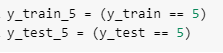

In [ ]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

Now we make a learning process

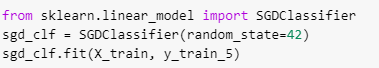

In [ ]:
[from sklearn.linear_model import SGDClassifier]
sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train , y_train_5)

**SGDCClassifier** relies on randomness during training(Stochastic) 

every time it run the result will be difficult

to fix the result you need to set the `random_state` parameter



Then you can use it to detect that this number is 5 or not.
Ploting the index of any number

image.png

In [ ]:
plot_digits([X[5],X[202]])

See the prediction

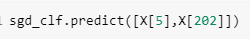

In [ ]:
sgd_clf.predict([X[5],X[202]])

to see the real label value

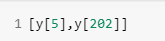

In [ ]:
[y[5],y[202]]

##Performance Measures
---

EValuating a regressor, there are many measurement available.



###Cross-validation
---
Reassembling the data using the differnt fold

The normal code for the k-fold is run like this

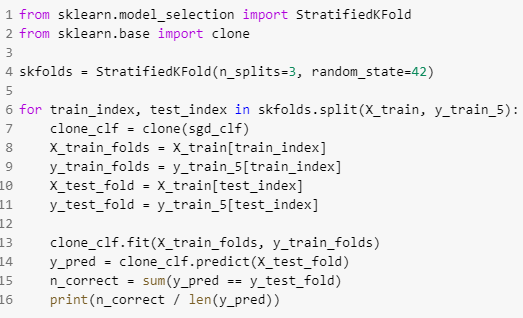

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds  = StratifiedKFold(n_splits = 3 , random_state = 42)
for train_index , test_index in skfolds.split(X_train , y_train_5) :
      clone_clf = clone(sgd_clf)
      X_train_folds = X_train[train_index]
      y_train_folds = y_train_5[train_index]
      X_test_folds = X_train[test_index]
      y_test_folds = y_train_5[test_index]

      clone_clf.fit(X_train_folds,y_train_folds)
      y_pred = clone_clf.predict(X_test_folds)
      n_correct = sum(y_pred == y_test_folds)
      print(n_correct / len(y_pred))

This code are provided in a simple code as given

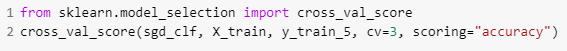


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv=3 , scoring="accuracy")

this about 95% accuracy (ratio of correct prediction)


Now we will provide the dump clasification that every image is in the "not-5" class

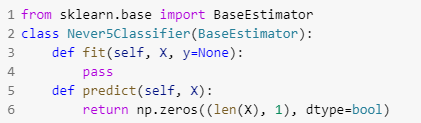

With this class, when we try to predict anything, it will return False (the default return value of the boolean type)

now we check for the accuracy

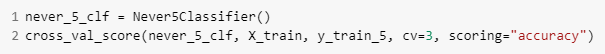

The accuracy is still 90percent!!!
This is becuase only about 10% of the images are 5s

This show that why accuracy is not preferred performance measure for classifers
Exspecially we are dealing with *skew data set*


> Skewed datasets is when the classes are much more frequent than the other



###Confusion Matrix
---

The confusion matrix is calcualted from counting the number of times instace of class A are classified as class B
The result is shown in the image, and it can be calculated uisng the `cross_val_predict` method

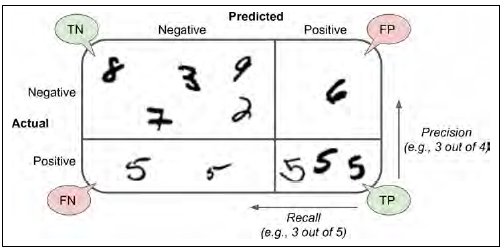

The code for calculate the cross value prediciton is shown here


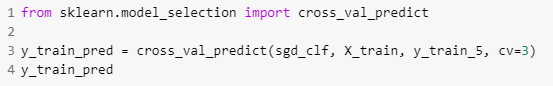


To get the confusion matrix call, call methods

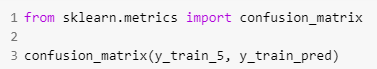

The confusion metrix value when our prediction model is 100 % Accuracy can be see in

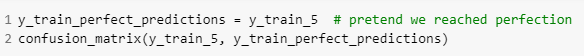

The perfect prediction can be found in 

**Precision**  The accuracy of positive prediction. (Predict for the correct value)


> $precision = \frac{TP}{TP + FP}$



**Recall** or sensitivity or true positive rate, this is the ratio of positive instances taht are correctly detected by the classifier

> $precision = \frac{TP}{TP + FN}$

The score can be calucalted form the given code

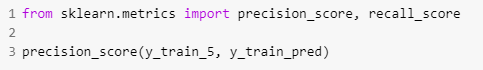

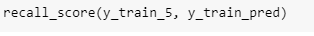

To compare two classifiers, the simple way to compare is provided.
**F1** score is the harmonic mean of precision and recall.

Instead of regular mean, the harmonic mean give much more weight to low values. 

The high **F1** is from both high recall and precision.

>$F_{1} = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times{\frac{precision \times recall}{precision + recall}} = \frac{TP}{TP+ \frac{FN+FP}{2}}  $

The F1 score can be found 

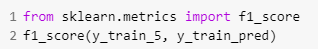

###The ROC Curve
---

**Receiver operating charectristic** (ROC)

ploting the *true positive rate* (another name of *recall*) against the false positive rate (FPR).
The FPR is the ratio of negative instance that are incorrectly clasified as positive. it is equal to one minus the true negative rate.

The True negative rate (TNR)  is also called *specificity*

ROC curve plots the sensitivity (recal) versus 1 - specificity

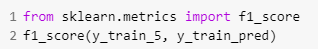

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

Calculate the Prediction data
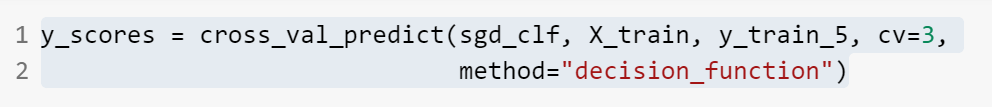

Roc curve value are from

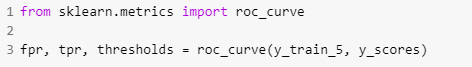

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)       

and then plotting the graph using the given code

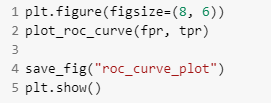

There are another classification technic as `RandomForest` classifier 

To compare the reslt, we need to train the model first

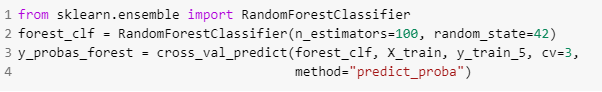

Then get the result

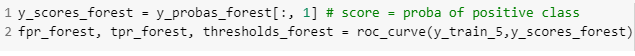

Then plot the compare curve

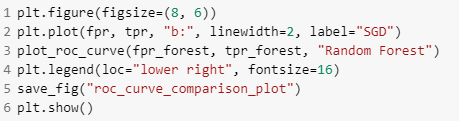


##Work



###Work 1
---
 Given the Wisconsin Cancer Data set
[The data set](https://drive.google.com/file/d/18XPM8b1_BKiMsEGzt0cP898KD8IYadYn/view?usp=sharing)
[The name](https://drive.google.com/file/d/1cyrfhsU5P_vtixliwzC-JEvfbX7Qhdul/view?usp=sharing)

create the prediction model lusing the SGD, and Random Forest technique.
Show the prediction of some values, and then 


compare accuracy, F1 and ROC from SGD, and Random Forest technique.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.data' , header=None)

In [ ]:
frame_non_na = df.dropna()

In [ ]:
frame_non_na

In [ ]:
X , y  = frame_non_na.iloc[:,1:10] , frame_non_na[10]

In [ ]:
X = frame_non_na.replace("?" , np.nan)

In [ ]:
X = X.dropna()

In [ ]:
X.shape

In [ ]:
X[X.isnull().any(axis=1)]

In [ ]:
y[y.isnull()]

In [ ]:
y.shape

In [ ]:
X_train ,X_test ,y_train , y_test = X[:550], X[550:],y[:550],y[550:]

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import numpy as np
shuffle_index = np.random.permutation(550)
shuffle_index

In [ ]:
X_train_shuffle , y_train_shufle = X_train.iloc[shuffle_index] , y_train.iloc[shuffle_index]

In [ ]:
X_train_shuffle 

In [ ]:
y_train

In [ ]:
y_train_benign  =(y_train_shufle ==2)
y_test_benign = (y_test ==2)

In [ ]:
y_train_benign

In [5]:
from sklearn.linear_model import  SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [6]:
sgd_clf.fit(X_train_shuffle , y_train_benign)

NameError: name 'X_train_shuffle' is not defined

In [ ]:
sgd_clf

In [ ]:
sgd_clf.predict( X_train_shuffle  )

###Work 2
---
With the given data set.
[Haberman's Survial Data set](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

1. Using the machine learning to check that will you servive after the operation or not. (You have to make a text to explain your attribute and show your result.
2. Again compare the accuracy, F1 and ROC from SGD, and Random Forest technique

##Conclusion
---
There are many other technique for classification.
The other examples are model trainig support vector machine, and decision tree. The nueron network is also used. The different things is neuron netowrk does not use any statistical model to train the model. The different is the output of the models.